# Statistical Mechanics

## The Canonical Ensemble
Most physical systems are not isolated, but exchange energy with the
environment. Since the system is very small compared to the environment,
we consider that the environment acts effectively as a heat reservoir or
heat bath at a fixed temperature $T$. If a small system is put in
thermal contact with the heat bath, it will reach thermal equilibrium
exchanging energy until the system attains the temperature of the bath.

Imagine an infinitely large number of mental copies of the system and
the heat bath. The probability $P_s$ that the system is found in a
microstate $s$ with energy $s$ is given by:
$$P_s=\frac{1}{Z}e^{-E_s/k_BT},
$$ where $Z$ is the normalization constant. This
corresponds to the canonical ensemble. Since $\sum P_s = 1$, we have
$$Z=\sum_s{e^{-E_s/k_BT}},
$$ where the sum is over all the possible microstates of the
system. This equation defines the “partition function” of the system.

We can use (\[c\_boltz\]) to obtain the ensemble average of physical
quantities of interest. For instance, the mean energy is given by:
$$\langle E \rangle = \sum_s E_s\, P_s=\frac{1}{Z}\sum_s{E_s\,e^{-\beta
E_s}},$$ 
with $\beta=1/k_BT$.

The Metropolis algorithm
------------------------

We want to obtain an estimate for the mean value of an observable $A$:
$$\langle A \rangle = \sum_s A_s e^{-\beta E_s}/\sum_s e^{-\beta E_s},$$
where $E_s$ and $A_s$ are the values of the energy and the quantity $A$
in the configuration $s$. The idea of using Monte Carlo consists in
sampling a subset of configuration and approximating the average by the
mean over the sample:
$$\langle A \rangle \simeq \sum_s^{m} A_s e^{-\beta E_s}/\sum_s^{m}
e^{-\beta E_s},$$ where the sampling is over $m$ configurations.

A crude Monte Carlo procedure is to generate a configuration at random,
calculate $E_s$ and $A_s$, and the contributions of this configuration
to the sums. This is equivalent to the “hit and miss” Monte Carlo method
for evaluating integrals. We have seen that this approach is very
inefficient, because the configurations generated would likely be very
improbable and contribute very little to the sum. Instead, we want to
generate a sample of configurations that are <span>*important*</span>,
<span>*i. e.*</span> have large contributions to the sums. This is
precisely the equivalent to “importance sampling”. Hence, we need to
generate the configurations according to a probability distribution. In
this case, the most convenient one is not other than the Boltzmann
probability itself $P_s$ (\[c\_boltz\]). Since we will average over the
$m$ configurations generated with this probability, we must use the
expression:
$$\langle A \rangle \simeq \sum_s^{m} \frac{A_s}{P_s} e^{-\beta
E_s}/\sum_s^{m} \frac{1}{P_s}e^{-\beta E_s}
= \frac{1}{m}\sum_s^{m}A_s$$

The idea of the Monte Carlo algorithm consists in performing a random
walk over the space of configurations. The walker “hops” from a
configuration $i$ to another $j$ using the “transition probability”
$W=\min{\left(1,\frac{P_j}{P_i}\right)}.$ 
Replacing by the
corresponding expression, we obtain:
$W=\min{\left(1,e^{-\beta(E_j-E_i)}\right)}.$

Since we are only interested in the ratio $P_j/P_j$, it is not necessary
to know the normalization constant $Z$. Although we have picked this
expression for the transition probability $W$, is not the only choice.
It can be shown that the only requirement is that $W$ satisfies the
“detailed balance” condition:
$W(i \rightarrow j)e^{-\beta E_i} = W(j \rightarrow i)e^{-\beta E_j}.$

Another comon choice in the literature is given by:
$W(i\rightarrow j)=\frac{1}{e^{-\beta (E_j-E_i)}+1}.$
Note that if
$\Delta E=0$, then $W=1/2$ and the trial configuration has an equal
probability of being accepted.

# Pseudocode for Monte Carlo: Stat Mech Language

The pseudocode for a Monte Carlo simulation can be outlined as follows:

1.  Establish an initial configuration.

2.  Make a random trial change in the configuration. For example, choose
    a spin at random and try to flip it. Or choose a particle at random
    and attempt to displace it a random distance.

3.  Compute the change in the energy of the system $\Delta E$ due to the
    trial change.

4.  If $\Delta E \leq 0$, accept the new configuration and go to step 8.

5.  If $\Delta E$ is positive, compute the “transition probability”
    $W=e^{-\beta \Delta E}$.

6.  Generate a random number $r$ in the interval $[0,1]$.

7.  If $r \leq W$, accept the new configuration; otherwise retain the
    previous configuration.

8.  Repeat steps (2) to (8) to obtain a sufficient number of
    configurations or “trials”.

9.  Compute averages over configurations which are statistically
    independent of each other.
    
### Important conditions for validity

A Monte Carlo algorithm must satisfy detailed balance, but also **Ergodicity**. This means that the possible moves should guarantee that the system will explore the entire phase space. If there are regions of phase space that are not accessible via local moves, for instance, one should implement global moves or more complex update strategies.

### Exercise 11.1: Classical gas in 1D 

In this case, we assume that the particles do not interact and 
the particle velocities are continuous and unbounded. The
energy is the sum of the kinetic energies of the individual
particles. Hence, for and ideal gas, the only coordinates of interest are
the velocities. In order to change a configuration, we choose a particle
at random and change its velocity by a random amount according to the corresponding
transition probability. For simplicity we
consider only the one-dimensional case.

1.  Simulate an ideal gas of $N$ particles in 1D. Choose $N=20$, $T=100$
    and 200 MC steps. Give all the particles the same initial velocity
    $v_0=10$. Determine the value of the maximum velocity change
    $\Delta v$ so that the acceptance ratio is approximately $50\%$.
    What is the mean kinetic energy and mean velocity of the particles?

2.  We might expect that the total energy of an ideal gas to remain
    constant since the particles do not interact with each other and
    hence they cannot exchange energy directly. What is the initial
    value of the energy of the system? Does it remain constant? If it
    does not, explain how the energy changes. Explain why the measured
    mean particle velocity is zero even though the initial particle
    velocities are not zero.

3.  What is a simple criterion for “thermal equilibrium”? Estimate the
    number of Monte Carlo steps per particle necessary for the system to
    reach thermal equilibrium. What choice of the initial velocities
    allows the system to reach thermal equilibrium at temperature $T$ as
    quickly as possible?

4.  Compute the mean energy per particle for $T=10$, $100$ and $400$. In
    order to compute the averages after the system has reached thermal
    equilibrium, start measuring only after equilibrium has
    been achieved. Increase the number of Monte Carlo steps until the
    desired averages do not change appreciably. What is the approximate
    number of warmup steps for $N=10$ and $T=100$, and for $N=40$ and
    $T=100$? If the number of warmup steps is different in the two
    cases, explain the reason for this difference.

5.  Compute the probability $P(E)dE$ for the system of $N$ particles to
    have a total energy between $E$ and $E+dE$. Do you expect $P(E)$ to
    be proportional to $e^{-\beta E}$? Plot $P(E)$ as a function of $E$
    and describe the qualitative behavior of $P(E)$. Does the plot of
    $\ln{(P(E))}$ yield a straight line?
    
6.  Compute the mean energy for $T=10$, $20$, $30$,... $90$, $100$ and
    $110$ and estimate the heat capacity.

7.  Compute the mean square energy fluctuations $\langle \Delta E^2
    \rangle = \langle E^2 \rangle - \langle E \rangle ^2$ for $T=10$ and
    $T=40$. Compare the magnitude of the ratio $\langle \Delta E^2
    \rangle/T^2$ with the heat capacity determined in the previous item.



Acceptance ratio=  0.514018
<Energy>= 49.80249038482893
<Energy^2>= 7498.374265990942
Error= 0.10018069891411183
Acceptance ratio=  0.514086


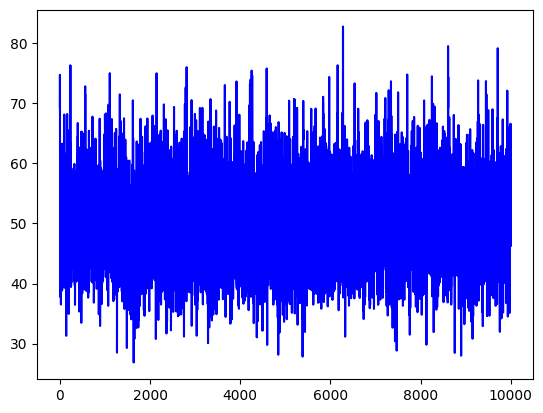

In [25]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

nwalkers = 100
v = np.zeros(nwalkers)
v.fill(10)
T = 100
delta = 20

def metropolis(vold):
    global delta, T
    vtrial = np.random.random()    
    vtrial = vold+(2*vtrial-1)*delta
    weight = np.exp(-(vtrial**2-vold**2)/T) # ratio of Boltzmann factors
    vnew = vold
    if(weight >= 1): #Accept
        vnew = vtrial
    elif(weight != 0):
        r = np.random.random()
        if(r <= weight): #Accept
            vnew = vtrial
    return vnew

# Warmup loop

Nwarmup = 10000
Ewarmup = np.zeros(Nwarmup)

Naccept = 0.
for j in range(Nwarmup):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        if(v[i] != vold):
            Naccept += 1
        
    Ewarmup[j] = np.sum(v**2)/nwalkers

x = np.arange(0,Nwarmup,1)
pyplot.plot(x,Ewarmup,ls='-',c='blue');


print("Acceptance ratio= ", Naccept/float(Nwarmup*nwalkers))

# Measurement loop

Nmeasure = 5000
Naccept = 0.
E = 0.
E2 = 0.
for j in range(Nmeasure):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        if(v[i] != vold):
            Naccept += 1

    E += np.sum(v**2)
    E2 += np.sum(v**4)

E = E/Nmeasure/nwalkers
E2 = E2/Nmeasure/nwalkers
print("<Energy>=", E)
print("<Energy^2>=", E2)
print("Error=", np.sqrt((E2-E**2)/Nmeasure/nwalkers)) # why is this a measure of error?
print("Acceptance ratio= ", Naccept/float(Nmeasure*nwalkers))
        
    

Simulation of the 2D Ising model
--------------------------------

One of the most interesting phenomena in nature is ferromagnetism. A FM
material exhibits a non-zero spontaneous magnetization in the absence of
an applied magnetic field. This occurs below a well-defined critical
temperature $T_c$ known as the Curie temperature. For $T > T_c$ the
magnetization vanishes. Hence $T_c$ separates two phases, a disordered
one for $T>T_c$, and a ferromagnetic one for $T<T_c$.

Although the Ising model is too simple, it already contains much of the
physics of the FM phase transition. In order to explore the properties
of this model, we need to calculate some physical quantities of
interest, including the mean energy $\langle E \rangle$, the mean
magnetization $\langle M \rangle$, the heat capacity $C$, and the
magnetic susceptibility $\chi$.

The Ising model
---------------

Consider a lattice with $N$ sites, where each site $i$ can assume two
possible states $s_i=+1,-1$, or spin “up” and spin “down”. A particular
configuration or microstate of the lattice is specified by the set of
variables $\{s_1,s_2,...s_N\}$ for all lattice sites.

Now we need to know the dependence of the energy $E$ of a given
microstate, according to the configuration of spins. The total energy in
the presence of a uniform magnetic field is given by the “Ising model”:
$$E=-J\sum_{\langle ij \rangle}s_is_j-h\sum_{i=1}^Ns_i,
$$ where the first summation is over all nearest neighbor
pairs and the second summation is over all the spins of the lattice. The
“exchange constant” $J$ is a measure of the strength of the interaction
between nearest neighbor spins. If $J>0$, the states with the spins
aligned $\uparrow \uparrow$ and $\downarrow \downarrow$ are
energetically favored, while for $J<0$ the configurations with the spins
antiparallel $\uparrow \downarrow$ and $\downarrow \uparrow$ are the ones
that are preferred. In the first case, we expect that the state with
lower energy is “ferromagnetic”, while in the second case, we expect it
to be “antiferromagnetic”. If we subject the system to a uniform
magnetic field $h$ directed upward, the spins $\uparrow$ and
$\downarrow$ possess and additional energy $-h$ and $+h$ respectively.
Note that we chose the units of $h$ such that the magnetic moment per
spin is unity.

Instead of obeying Newton’s laws, the dynamics of the Ising model
corresponds to “spin flip” processes: a spin is chosen randomly, and the
trial change corresponds to a flip of the spin $\uparrow \rightarrow
\downarrow$ or $\downarrow \rightarrow \uparrow$.


### Physical quantities

The net magnetic moment or "magnetization" $M$ is given by
$$M=\sum_{i=1}^N s_i.
$$ Usually we are interested in the average
$\langle M \rangle$ and the fluctuations
$\langle M^2 \rangle - \langle M \rangle ^2$ as a function of the
temperature of the system and the applied magnetic field. 
Notice that in the absence of a magnetic field, the value of $M$ should average zero.
This is because the system is as likely to be found with all the spins pointing up or down.
Therefore, one typically measures $m=\sqrt{M^2}$ or $m=|M|$, which is always a positive quantity.

### The heat capacity

One way to measure the heat capacity at constant external field id from
the definition: $$C=\frac{\partial \langle E \rangle}{\partial T}.$$
Another way is to use the statistical fluctuations for the total energy
in the canonical ensemble:
$$C=\frac{1}{(k_BT)^2}\left( \langle E^2 \rangle - \langle E \rangle ^2
\right).$$

### The magnetic susceptibility

The magnetic susceptibility $\chi$ is an example of a “response function
”, since it measures the ability of a spin to “respond” or flip with a
change in the external magnetic field. The zero isothermal magnetic
susceptibility is defined by the thermodynamic derivative
$$\chi=\lim _{H \rightarrow 0} \frac{\partial \langle M \rangle}{\partial H}.$$
The zero field susceptibility can be related to the magnetization
fluctuations in the system:
$$\chi=\frac{1}{k_BT} \left( \langle M^2 \rangle - \langle M \rangle ^2
\right),$$ 
where $\langle M^2 \rangle$ and $\langle M \rangle ^2$ are
zero field values.

Metropolis algorithm
--------------------

### Moves

One typically picks a random spin and it is flipped or not by calculating the energy difference between the considered spin and its 4 nearest neighbors using the formula:

 $$U = J  s(x,y)  [s(x+1,y)   + s(x-1,y)    + s(x,y+1)+ s(x,y-1)]$$

The energy change is $\Delta U = 2U$.
The spin then directly flips if $\Delta U \le 0$. Otherwise, it only flips if a randomly chosen number between 0 or 1 is smaller than the Boltzmann factor $\exp(-kT\Delta U)$. 

Notice that the sum in brackets can run from -4 to +4, so we can easily store the values for all the possible configurations in lookup tables.

### Boundary conditions

Since we are interested in the properties of an infinite system, we have
to consider the boundary conditions. The simplest case corresponds to
“free boundary condition”. In a 1D chain, the spins at sites $1$ and $N$ are open
ends and have one interaction each. In general a better choice is
periodic boundary conditions, where sites 1 and $N$ interact with each
other closing a loop. In this situation, the chain has the topology of a
ring, and all the spins have the same number of interactions. We also
say that there is translational invariance, since the origin can be
picked arbitrarily.

As discussed earlier, the use of PBC minimizes the finite size effects.
However, a disadvantage is that they reduce the minimum separation
between two spins to half the length of the system. In a 2D system we need to
account for the periodicity on both the $x$ and $y$ directions, and our
system will have the topology of a torus.

### Initial conditions and equilibration

We can pick a random initial configuration. However, as we shall see, in
some simulations the equilibration process can account for a substantial
fraction of the total computer time. The most practical choice of an
initial condition is an “equilibrium” configuration of a previous run
which is at a temperature close to the desired temperature.

### Tricks

It is convenient that we store all the transition probabilities in
lookup tables, so we do not have to calculate them at each step. Another
trick consists of storing all the positions of the spins and their
neighbors to avoid calculating many random numbers. If you need to
perform several runs for different values of the temperature $T$, you
can do it at the same time using the same random numbers.

### Exercise 11.2: Equilibration of the 2D Ising model 

1.  Run your simulation with $L=8$ and $T=2$ and choose the initial
    spins to be all up. Plot the variation of the energy and the
    magnetization with time. How much time is necessary for the system
    to reach equilibrium?

2.  Visually inspect several “equilibrium” configurations. Is the system
    ordered or disordered?

3.  Run the program with $T=1.5$ and chose the same initial
    configuration with all the spins up. How long does it take for the
    system to reach equilibrium?

4.  Visually inspect several equilibrium configurations with $T=1.5$.
    Are they more or less ordered than those in part 2?

5.  Is the acceptance ratio and increasing or decreasing function of
    $T$? Does the Metropolis algorithm become more or less efficient at
    low temperatures?



Implementation: first we set up a class for the Ising model itself, prior to any simulation.

In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import matplotlib.animation as animation

class BoundaryCondition:
    RBC, PBC = range(2)
    
class Direction:
    RIGHT, TOP, LEFT, BOTTOM = range(4)
    
class Ising(object):
    
    def __init__ (self, L, J, T):
      
        self.L = L
        self.N = L*L
        self.TWOJ = 2.*J
        self.T = T
        self.beta = 1./T
        
        # Initialize site positions
        # Initialize neighbors table for boundary conditions
        self.nn = np.zeros(shape=(self.N,4), dtype=np.int16)
        self.position = np.zeros(shape=(L,L), dtype=np.int16)
        self.x = np.zeros(self.N, dtype=np.int16)
        self.y = np.zeros(self.N, dtype=np.int16)

        # Periodic boundary conditions
        n = 0
        for iy in range(L):
            for ix in range(L):
                self.position[iy,ix] = n
                self.x[n] = ix
                self.y[n] = iy
                self.nn[n,Direction.LEFT] = n-1
                self.nn[n,Direction.RIGHT] = n+1
                self.nn[n,Direction.TOP] = n+L
                self.nn[n,Direction.BOTTOM] = n-L
                if(ix == 0):
                    self.nn[n,Direction.LEFT] = n+L-1
                if(ix == L-1):
                    self.nn[n,Direction.RIGHT] = n-(L-1)
                if(iy == 0):
                    self.nn[n, Direction.BOTTOM] = n+(L-1)*L
                if(iy == L-1):
                    self.nn[n, Direction.TOP] = n-(L-1)*L
                n += 1

        # Initialize spins
        r = np.random.random(self.N)*2-1
        self.spin = np.ones(self.N, dtype=np.int16)
        for i in range(self.N):
            if(r[i] < 0):
                self.spin[i] *= -1
                
        self.Mtot = np.sum(self.spin)
        self.E = 0.
        for i in range(self.N):
            self.E += -J*self.spin[i]*(self.spin[self.nn[i,Direction.RIGHT]]+self.spin[self.nn[i,Direction.TOP]])

        # Transition probabilities
        self.de = np.zeros(shape=(3,9)) # spins -1 and 1 only, but choose 3 to index as below. 9 = range of spin_sum, -4 . . . 4
        self.w = np.zeros(shape=(3,9))
        self.set_temp(self.T)
                                                             
    def set_temp(self, T):
        self.T = T
        self.beta = 1./T
        # Lookup tables for transition probabilities
        for spin_sum in range(-4,5):
            self.de[0,spin_sum+4] = -self.TWOJ*spin_sum
            self.de[2,spin_sum+4] = self.TWOJ*spin_sum
            p = np.exp(-self.beta*self.de[0,spin_sum+4])
            self.w[0,spin_sum+4] = min(p, 1.)
            self.w[2,spin_sum+4] = min(1./p,1.)
                                                             
    def metropolis(self):
        nchanges = 0
        if True: # for n in range(self.N):
            # trial spin change
            # pick a random particle
            i = int(np.random.random()*self.N)

            # change in energy
            iright = self.nn[i, Direction.LEFT]
            ileft = self.nn[i, Direction.RIGHT]
            itop = self.nn[i, Direction.TOP]
            ibottom = self.nn[i, Direction.BOTTOM]

            spin_sum = self.spin[ileft] + self.spin[iright] + self.spin[itop] + self.spin[ibottom]

            s = self.spin[i]
            deltaE = self.de[s+1,spin_sum+4]

            # accept if lowers energy or random num below w
            if(deltaE <= 0. or np.random.random() < self.w[s+1,spin_sum+4]):
                self.spin[i] *= -1
                self.Mtot += 2*(-s)
                self.E += deltaE
                nchanges += 1

        return nchanges
        


T =  3
<E>/N =  -0.92308
<E^2>/N =  0.89868
<M>/N =  0.4075
<M^2>/N =  0.1890804
C= 0.005178145955555559
chi= 0.007674716666666674
Acceptance ratio =  0.004073333333333333


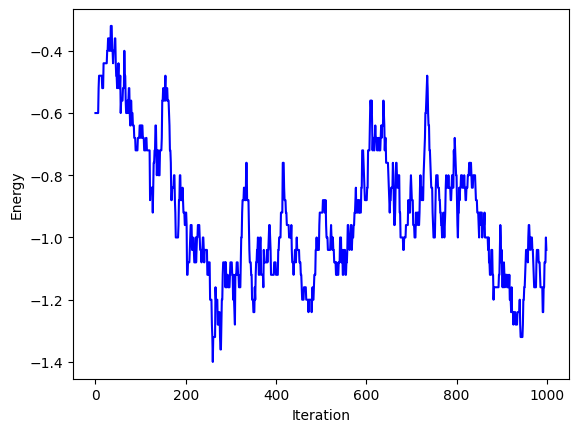

In [15]:
L=10
Nwarmup = 100
Nsteps = 1000
Ndecorr = 3
Temp = 3
J = 1.

S = Ising(L, J, Temp)
E = np.zeros(Nsteps)
M = np.zeros(Nsteps)

for i in range(Nwarmup):
    S.metropolis()

naccept = 0
for i in range(Nsteps):
    for n in range(Ndecorr):
        naccept += S.metropolis()
    E[i] = S.E
    M[i] = abs(S.Mtot)

E /= S.N
M /= S.N


Et = np.sum(E)/Nsteps
E2t = np.sum(E**2)/Nsteps
Mt = np.sum(M)/Nsteps
M2t = np.sum(M**2)/Nsteps

print("T = ", Temp)
print("<E>/N = ", Et)
print("<E^2>/N = ", E2t)
print("<M>/N = ", Mt)
print("<M^2>/N = ", M2t)
print("C=", (E2t-Et*Et)/Temp/Temp)
print("chi=", (M2t-Mt*Mt)/Temp)
print("Acceptance ratio = ", float(naccept)/S.N/Nsteps/Ndecorr)
        
pyplot.plot(np.arange(0,Nsteps,1),E,ls='-',c='blue');
pyplot.xlabel("Iteration")
pyplot.ylabel("Energy");

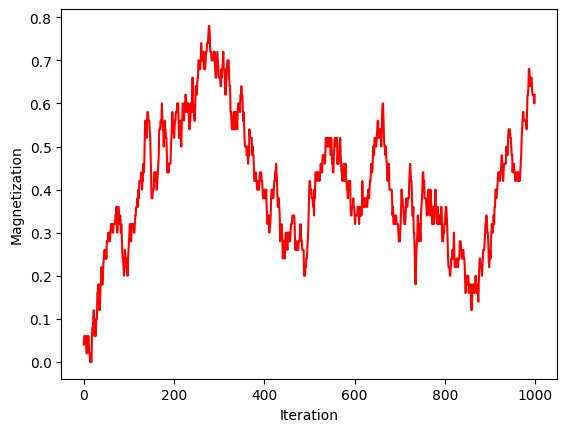

In [16]:
pyplot.plot(np.arange(0,Nsteps,1),M,ls='-',c='red');
pyplot.xlabel("Iteration")
pyplot.ylabel("Magnetization");

In [17]:
T = np.arange(0.2,8,0.2)

Mt = np.zeros(T.size)
Et = np.zeros(T.size)
M2t = np.zeros(T.size)
E2t = np.zeros(T.size)

S = Ising(L, J, 0.2)

Nsteps = 10000
Nwarmup = 10000
n = 0
for t in T:
    S.set_temp(t)
    for i in range(Nwarmup):
        S.metropolis()

    for i in range(Nsteps):
        for j in range(Ndecorr):
            S.metropolis()
        Et[n] += S.E
        Mt[n] += abs(S.Mtot)
        E2t[n] += S.E**2
        M2t[n] += abs(S.Mtot)**2

    print(t, Mt[n], Mt[n]/Nsteps/S.N)
    n += 1

Mt /= float(Nsteps*S.N)
Et /= float(Nsteps*S.N)
E2t /= float(Nsteps*S.N*S.N)
M2t /= float(Nsteps*S.N*S.N)
ErrorE = np.sqrt((E2t-Et**2)/Nsteps)
ErrorM = np.sqrt((M2t-Mt**2)/Nsteps)

0.2 1000000.0 1.0
0.4 1000000.0 1.0
0.6000000000000001 1000000.0 1.0
0.8 999680.0 0.99968
1.0 998882.0 0.9988819999999999
1.2000000000000002 997320.0 0.99732
1.4000000000000001 988710.0 0.98871
1.6 977578.0 0.9775780000000001
1.8 960418.0 0.960418
2.0 929178.0 0.929178
2.2 851224.0 0.851224
2.4000000000000004 655740.0 0.65574
2.6 574812.0 0.574812
2.8000000000000003 387206.0 0.387206
3.0 247358.0 0.24735800000000002
3.2 311020.0 0.31102
3.4000000000000004 194748.0 0.19474799999999998
3.6 185454.0 0.185454
3.8000000000000003 167170.0 0.16716999999999999
4.0 159714.0 0.159714
4.2 155670.0 0.15567
4.4 163740.0 0.16374
4.6000000000000005 166318.0 0.166318
4.800000000000001 141622.0 0.141622
5.0 136576.0 0.136576
5.2 134454.0 0.134454
5.4 135432.0 0.135432
5.6000000000000005 121552.0 0.12155200000000001
5.800000000000001 134236.0 0.134236
6.0 117648.0 0.11764799999999999
6.2 108802.0 0.10880200000000001
6.4 119848.0 0.119848
6.6000000000000005 103540.0 0.10354
6.800000000000001 114864.0 0.1

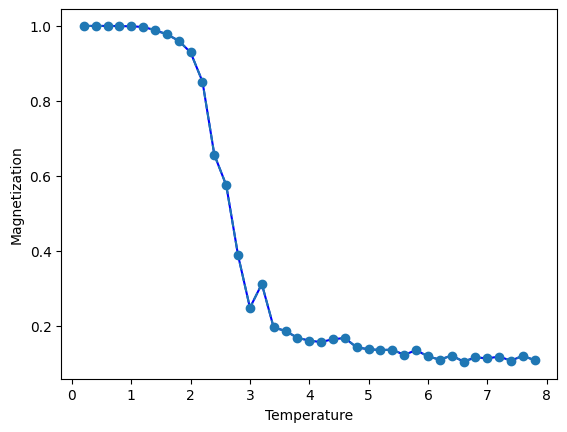

In [18]:
pyplot.plot(T,Mt,ls='-',c='blue')
pyplot.errorbar(T, Mt, yerr=[ErrorM, ErrorM], fmt='--o')
pyplot.ylabel("Magnetization")
pyplot.xlabel("Temperature");

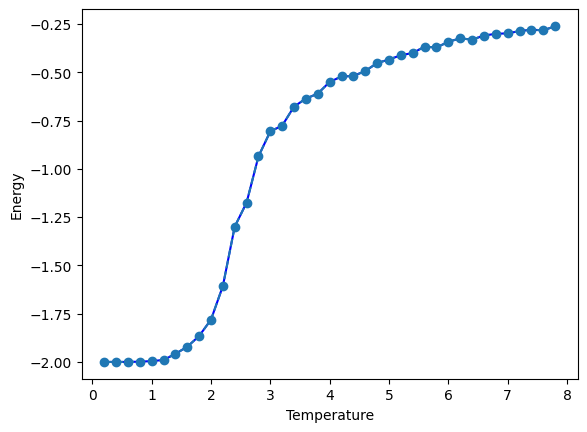

In [19]:
pyplot.plot(T,Et,ls='-',c='blue')
pyplot.errorbar(T, Et, yerr=[ErrorE, ErrorE], fmt='--o')
pyplot.ylabel("Energy")
pyplot.xlabel("Temperature");

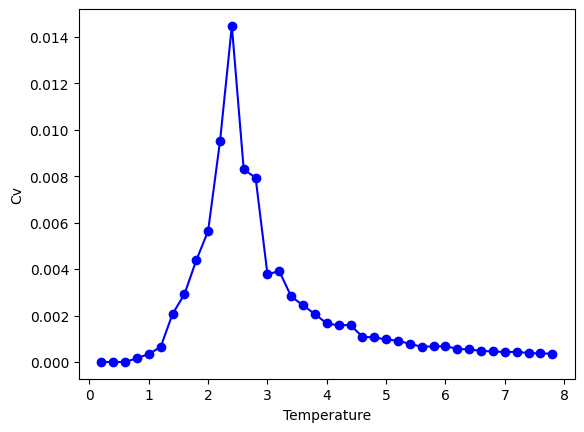

In [20]:
pyplot.plot(T,(E2t-Et**2)/T/T,marker='o',ls='-',c='blue');
pyplot.ylabel("Cv")
pyplot.xlabel("Temperature");

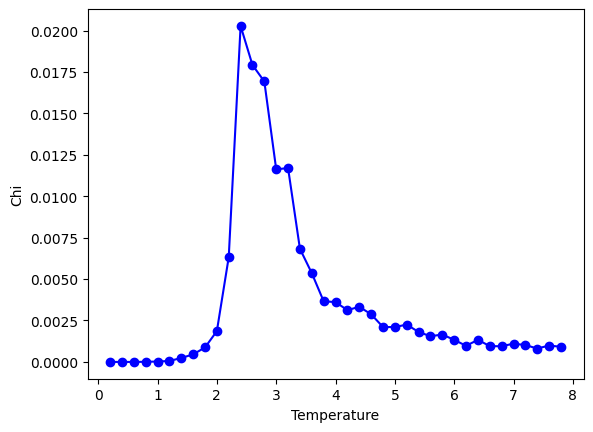

In [21]:
pyplot.plot(T,(M2t-Mt**2)/T,marker='o',ls='-',c='blue');
pyplot.ylabel("Chi")
pyplot.xlabel("Temperature");

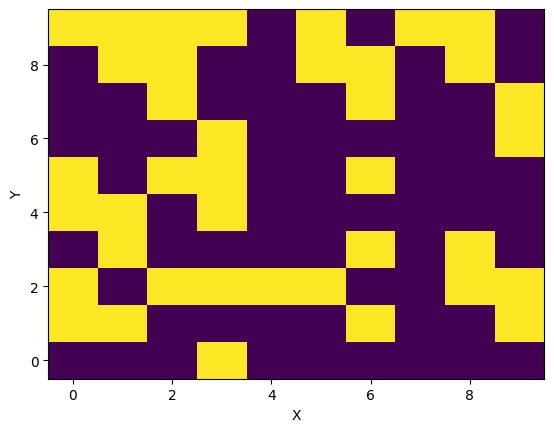

In [22]:
x, y = np.meshgrid(np.arange(0,L,1),np.arange(0,L,1))
s = S.spin.reshape(L,L)
pyplot.pcolormesh(x,y,s)
pyplot.ylabel("Y")
pyplot.xlabel("X");

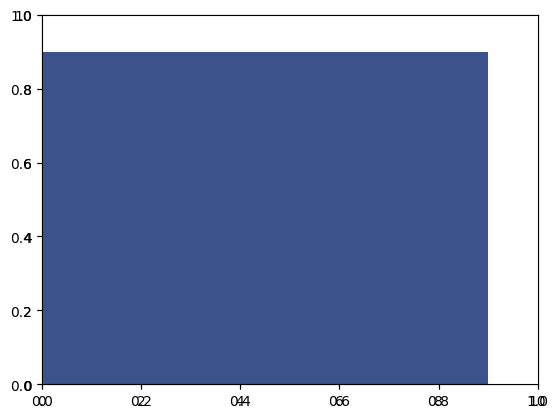

In [23]:
from IPython.display import HTML
# Animation

S.set_temp(2.27) #2.27
S.spin.fill(1)

fig, ax = pyplot.subplots()
ax = pyplot.axes(xlim=(0, L), ylim=(0, L))
Sdata = S.spin.reshape(L,L)
cont = ax.contourf(x,y,Sdata)

def evolve(i):
    global x, y, S
    S.metropolis()
    Sdata = S.spin.reshape(L,L)
    cont = ax.contourf(x,y,Sdata)
    return cont,

anim = animation.FuncAnimation(fig, evolve, frames = 30, interval=100, blit = False)

HTML(anim.to_jshtml())            



#### Challenge 11.2

Modify the code to calculate the correlation function 

$$ C(r) = \langle s_0 s_r \rangle - \langle s_0 \rangle \langle s_r \rangle $$

Plot the correlations along the $x$ direction across the phase transition and describe its behavior.